<a href="https://colab.research.google.com/github/jjcrofts77/TMB-MATH34041/blob/main/content/notebooks/Chapter1/BasicStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.2 Basic Statistics

In this section we shall describe a number of basic network measures that allow us to characterize one or several aspects of *local* and/or *global* network architecture. 

To illustrate the the main concepts we shall use the undirected network shown in {numref}`FigExample111`) below.

```{figure} ../../images/SimpleNetwork8Nodes.png
---
height: 350px
name: FigExample121
---
Example of undirected and directed networks 
``` 

## Degree, strength and their distributions

Given an undirected network the *degree* of a node is simply the number of edges incident to it. For example, nodes 1 and 4 in the network of Figure {numref}`FigExample121` have degree 4 and 3, respectively. This idea naturally generalises to the degree sequence of a network, which is simply the vector of degrees

$$
 \mathbf{k} = [k_1, k_2,\ldots,k_n].
$$

Here, $k_i$ gives the degree of node $i$ and so for the example network of Figure {numref}`FigExample111`(a) we have that the degree sequence is given by

$$
\mathbf{k} = [4, 3, 4, 3, 1, 1, 1, 1].
$$

In terms of the adjacency matrix the degree of a node is simply

$$
 k_i = \sum_{j=1}^n a_{ij}.
$$ (degree)

Using the result in Equation {eq}`degree` we can work out the *mean degree* of a network as follows:

$$
 \langle k\rangle &= \frac{1}{n}\sum_{i=1}^n k_i\\
 &=  \frac{1}{n}\sum_{i=1}^n\sum_{j=1}^n a_{ij}\\
 &= \frac{2m}{n}.
$$

The last line follows by noting that the sum over all entries of the adjacency matrix is equal to twice the number of edges (here we assume our network is undirected and unweighted).

A related and useful quantity is the *density* of a network. The density tells us what proportion of a networks edges are present and is given by

$$
 \rho &= \frac{\text{Number of edges}}{\text{Possible number of edges}}\\
 &= \frac{m}{n(n-1)/2} = \frac{2m}{n(n-1)}\\ &= \frac{\langle k\rangle}{n-1}.
$$ (densitydenom)

The denominator in Equation {eq}`densitydenom` is obtained by comparing against the *complete graph*, or network, i.e. a network for which all edges are present. Such a network has a degree sequence given by $[n-1,n-1,\ldots,n-1]$ and so has $n(n-1)/2$ edges in total (**Qn:** where does the factor of two come from in the above calculations?).  Most real-world networks, and particularly biological ones, have `low' density scores; we call such networks *sparse*. Alternatively, we say that a network is *dense* if it is not sparse.

All of the above can be naturally extended when considering either directed and/or weighted networks. For example, in the case of a directed network we consider an in- and out-degree for each node, such that the in-degree counts the number of incoming edges and the out-degree the number of out-going edges.

$$
 k_j^\mathrm{in} = \sum_{i=1}^n a_{ij} \quad \text{and} \quad k_i^\mathrm{out} = \sum_{j=1}^n a_{ij}.
$$

In- and out-degree sequences are then defined as above. Note that in this case the mean degrees are equal, differing from the undirected case by a factor of two:

$$
\langle k^\mathrm{in}\rangle = \frac{1}{n}\sum_{i=1}^n k_i^\mathrm{in} = \frac{1}{n}\sum_{i=1}^n k_i^\mathrm{out} = \langle k^\mathrm{out}\rangle = \frac{m}{n}.
$$

For a weighted network the *strength* of a node replaces the idea of degree, and is simply the sum of the weights of all incident edges

$$
 s_i = \sum_{j=1}^n w_{ij}.
$$

Again, we could have an in- and out-strength if we were to consider a directed, weighted network.

A related quantity to the degree sequence of a network is the *degree distribution*, $\{p_k\}$. Given a network, $p_k$ is defined as the probability that a randomly selected node has degree $k$. For the example network in Figure {numref}`FigExample121`, the degree distribution is given by 

$$
p_0 = 0,~ p_1 = \frac{4}{8},~ p_2 = 0,~ p_3 = \frac{2}{8},~ p_4 = \frac{2}{8},~ p_k = 0, \text{ for } k\geq 5.
$$

Note that since $\{p_k\}$ represents a probability distribution $\displaystyle\sum_{k=0}^\infty p_k = 1$. The degree distribution for the network in Figure {}``(a) is shown below along with the python code used to create it.

[4, 4, 3, 3, 1, 1, 1, 1]


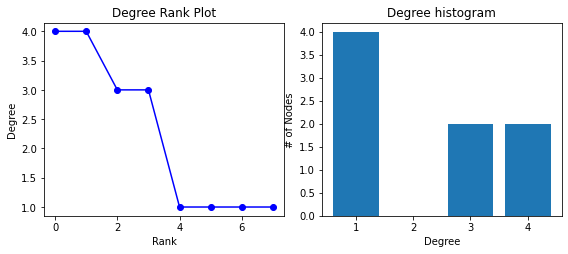

Note:
1. The plots above show a ranking of the nodes (LHS) and the degree disribution (RHS) for Figure 1(a)
2. We should divide each bar by |V| to obtain a probability distribution


In [21]:
# degree distribution
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# construct network
N = nx.Graph()
edges = [(1,2),(1,3),(1,4),(1,5),(2,3),(2,6),(3,4),(3,7),(4,8)]
N.add_edges_from(edges)

degree_sequence = sorted((d for n, d in N.degree()), reverse=True)
dmax = max(degree_sequence)

print(degree_sequence)

fig = plt.figure("Degree of a the undirected network in Figure 1", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
#axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, 2:])
ax1.bar(*np.unique(degree_sequence, return_counts=True))
ax1.set_title("Degree histogram")
ax1.set_xlabel("Degree")
ax1.set_ylabel("# of Nodes")

ax2 = fig.add_subplot(axgrid[3:, :2])
ax2.plot(degree_sequence, "b-", marker="o")
ax2.set_title("Degree Rank Plot")
ax2.set_ylabel("Degree")
ax2.set_xlabel("Rank")

fig.tight_layout()
plt.show()

```{note}
 1. The plots above show a ranking of the nodes (LHS) and the degree disribution (RHS) for Figure 1(a)")
 2. We should divide each bar by |V| to obtain a probability distribution")
```

In the above example the distribution is obtained via empirical data, however, a degree distribution can also be given directly by a formula, that is by a probability distribution such as the binomial or Poisson distribution.

```{figure} ../../images/DegDistCelegans.png
---
height: 350px
name: FigExample121
---
Degree distribution for the neuronal network of *C. elegans*
``` 

Many real-world networks have so-called *heavy-tailed degree distributions* which are skewed such that extreme events become more likely. Figure {numref}`FigExample121` shows a plot of the degree distribution for the neuronal network of *C. elegans* displayed in Figure {numref}`FigExample121`. Note that the distribution is not normalised and so strictly speaking is not a probability distribution. Distributions such as that in Figure {numref}`FigExample121` are often termed *power-law distributions* since they approximately follow a power law of the form

$$
 p_k = Ck^{-\alpha},
$$

with $C$ a normalising constant and $\alpha$ the exponent of the power law. 

For us, the most important properties of power law distributions are the following:

 1. if you plot $p_k = Ck^{-\alpha}$ on a doubly logarithmic scale then the result is a straight line with slope $\alpha$ (this is a useful, but non-rigorous, way of spotting a power law distribution);

 2. in the network literature power law distributions are frequently referred to as being *scale-free*; this is due to the fact the effect of scaling the degree by a constant factor $b$ produces only a proportionate scaling of the function, i.e.

$$
C\left(bk\right)^{-\alpha} = Cb^{-\alpha} k^{-\alpha};
$$
 3. it is often convenient to consider the *cumulative degree distribution*

 $$
  P_k = \sum_{k'=k}^\infty p_{k'} ,  
 $$ (cumPL)

 that is the fraction of nodes with degree greater than or equal to $k$. Suppose that $p_k = Ck^{-\alpha}$ then we can formulate an analytic approximation of Equation {eq}`cumPL` as follows:

 $$
  P_k &= C\sum_{k'=k}^\infty \left(k'\right)^{-\alpha} \approx C\int_k^\infty \left(k'\right)^{-\alpha}dk' \\
         &= \frac{-C}{1-\alpha}k^{1-\alpha};
 $$

 $\alpha$ determines which moments of the distribution converge (i.e. how heavy the tail is).

We shall consider a number of real-world networks that display power law distributions later on in the course.